### 从零实现线性回归

创建一个噪声符合标准正态分布的数据集

In [2]:
import torch

def synthetic_data(w,b,num_examples):
    x = torch.normal(0,1,size=(num_examples,len(w)))
    y = torch.matmul(x,w) + b
    y += torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

绘制上述数据集的三维散点图

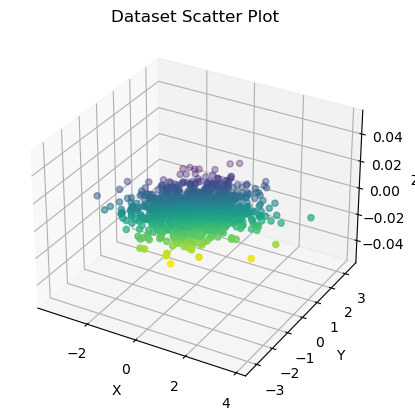

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(features[:,0],features[:,1],c=labels)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Dataset Scatter Plot')

plt.show()

绘制二维散点图（feature0、 与 label的关系）

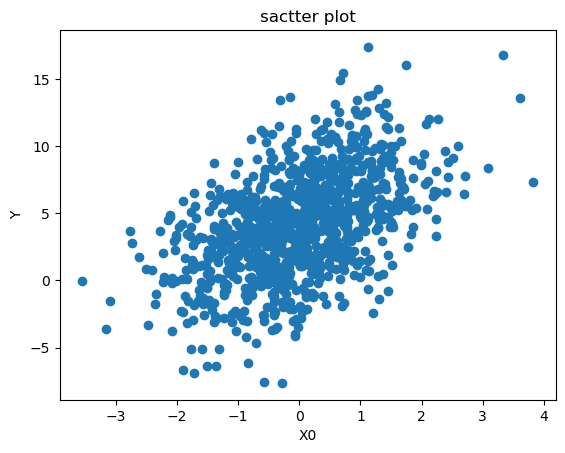

In [9]:
plt.scatter(features[:,0], labels)
plt.xlabel('X0')
plt.ylabel('Y')
plt.title('sactter plot')
plt.show()

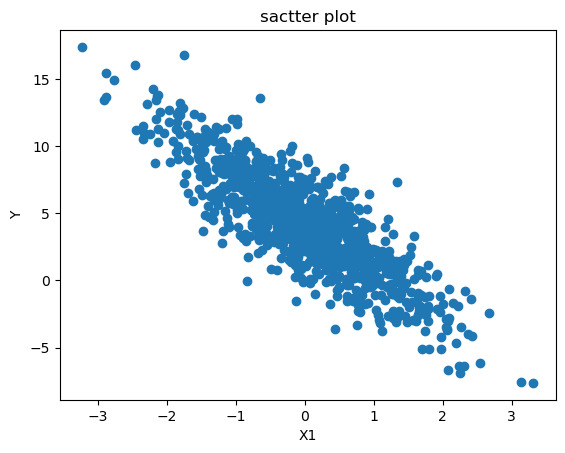

In [10]:
plt.scatter(features[:,1], labels)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('sactter plot')
plt.show()

读取数据集

In [3]:
from torch.utils import data

# 定义一个数据迭代器，它每次返回batch_size个样本的小批量数据
def load_array(data_arr,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_arr)   # 创建dataset对象
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [ ]:
next(iter(data_iter)) # 迭代器对象的next方法，用于获取迭代器中的下一个元素

[tensor([[ 0.7298, -0.3119],
         [-0.4710,  1.5000],
         [ 0.8227,  1.7308],
         [ 2.3612,  1.0849],
         [-1.4418, -0.2277],
         [-0.7610,  0.0349],
         [ 0.7982, -2.0515],
         [-0.1197,  0.0309],
         [-0.0102, -1.1711],
         [-0.8875, -0.8163]]),
 tensor([[ 6.7112],
         [-1.8394],
         [-0.0500],
         [ 5.2449],
         [ 2.0919],
         [ 2.5618],
         [12.7735],
         [ 3.8556],
         [ 8.1612],
         [ 5.1917]])]

定义线性模型

In [ ]:
from torch import nn
net = nn.Sequential(
    nn.Linear(2,1)
)

定义损失函数

In [6]:
loss = nn.MSELoss()

定义优化算法（随机梯度下降）

In [7]:
trainer = torch.optim.SGD(net.parameters(), lr=0.001)

执行训练

In [ ]:
num_epoch = 10              # 迭代周期
for epoch in range(num_epoch):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad() # 梯度清零
        l.backward()        # 计算梯度
        trainer.step()      # 更新参数
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.164393
epoch 2, loss 0.112818
epoch 3, loss 0.077459
epoch 4, loss 0.053206
epoch 5, loss 0.036569
epoch 6, loss 0.025151
epoch 7, loss 0.017312
epoch 8, loss 0.011931
epoch 9, loss 0.008234
epoch 10, loss 0.005694
